![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---
### Equipo:

- Daniel Minaya


### Link de repositorio de GitHub: `https://github.com/DanielMinaya1/MDS7202`

Fecha límite de entrega 📆: 22 de Diciembre de 2023.
---


## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de datos

In [1]:
!pip install lightgbm

# Instalamos la versión necesaria para KNN
!pip install scikit-learn==1.2.2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

from IPython.display import display, Markdown

from sklearn.metrics import classification_report, f1_score, precision_score

import optuna
from optuna.samplers import TPESampler, RandomSampler
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances

import shap

import numpy as np
import time

In [3]:
df = pd.read_parquet("dataset.pq")
df

customer_id   age     occupation  annual_income  monthly_inhand_salary  \
0       CUS_0xd40  23.0      Scientist       19114.12            1824.843333   
1      CUS_0x21b1  28.0        Teacher       34847.84            3037.986667   
2      CUS_0x2dbc  34.0       Engineer      143162.64           12187.220000   
3      CUS_0xb891  55.0   Entrepreneur       30689.89            2612.490833   
4      CUS_0x1cdb  21.0      Developer       35547.71            2853.309167   
...           ...   ...            ...            ...                    ...   
12495  CUS_0x372c  19.0         Lawyer       42903.79            3468.315833   
12496   CUS_0xf16  45.0  Media_Manager       16680.35                    NaN   
12497  CUS_0xaf61  50.0         Writer       37188.10            3097.008333   
12498  CUS_0x8600  29.0      Architect       20002.88            1929.906667   
12499  CUS_0x942c  25.0       Mechanic       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                      3                4              3          4.0   
1                      2                4              6          1.0   
2                      1                5              8          3.0   
3                      2                5              4       -100.0   
4                      7                5              5       -100.0   
...                  ...              ...            ...          ...   
12495                  0                4              6          1.0   
12496                  1                1              5          4.0   
12497                  1                4              5          3.0   
12498                 10                8             29          5.0   
12499                  4                6              7          2.0   

       delay_from_due_date  ...  num_credit_inquiries  outstanding_debt  \
0                        3  ...                   4.0            809.98   
1                        3  ...                   2.0            605.03   
2                        8  ...                   3.0           1303.01   
3                        4  ...                   4.0            632.46   
4                        1  ...                   4.0            943.86   
...                    ...  ...                   ...               ...   
12495                    9  ...                   1.0           1079.48   
12496                    1  ...                   8.0            897.16   
12497                    7  ...                   3.0            620.64   
12498                   33  ...                   9.0           3571.70   
12499                   18  ...                   3.0            502.38   

       credit_utilization_ratio  credit_history_age  payment_of_min_amount  \
0                     23.933795                 NaN                     No   
1                     32.933856                27.0                     No   
2                     38.374753                18.0                     No   
3                     27.332515                17.0                     No   
4                     25.862922                31.0                    Yes   
...                         ...                 ...                    ...   
12495                 35.716618                28.0                     No   
12496                 41.212367                 NaN                     No   
12497                 39.300980                30.0                     No   
12498                 37.140784                 6.0                    Yes   
12499                 34.192463                31.0                     No   

       total_emi_per_month amount_invested_monthly  \
0                49.574949               24.785217   
1                18.816215              218.904344   
2               246.992319            10000.000000   
3                16.415452              125.617251   
4                 0.000000              181.330901   
...   

## 1. Introducción

Este proyecto tiene como objetivo la clasificación de clientes candidatos a un préstamo con el fin de reducir los riesgos de préstamo. Para esto se cuenta con el atributo $\texttt{credit_score}$ que toma dos valores: 1 si el cliente es apto para optar a un préstamo y 0 si no. De este modo, se quieren construir modelos de clasificación binaria con esta variable a predecir (variable objetivo).

Para enfrentar este problema se cuentan con diversas características de los clientes:
- $\texttt{customer-id}$: identificador del cliente,
- $\texttt{age}$: edad,
- $\texttt{occupation}$: ocupación,
- $\texttt{annual_income}$: ingresos anuales,
- $\texttt{monthly_inhand_salary}$: salario mensual después de reducción de impuestos,
- $\texttt{num_bank_accounts}$: cantidad de cuentas bancarias,
- $\texttt{num_credit_card}$: cantidad de tarjetas de créditos,
- $\texttt{interest_rate}$: tasa de interés,
- $\texttt{num_of_loan}$: cantidad de préstamos realizados,
- $\texttt{delay_from_due_date}$: tiempo de retraso (en días),
- $\texttt{num_of_delayed_payment}$: cantidad de veces con retraso,
- $\texttt{changed_credit_limit}$: porcentaje de cambio en el límite de crédito,
- $\texttt{num_credit_inquiries}$: cantidad de indagaciones de crédito, 
- $\texttt{outstanding_debt}$: deuda pendiente,
- $\texttt{credit_utilization_ratio}$: porcentaje de utilización de crédito,
- $\texttt{credit_history_age}$: tiempo de historial crediticio,
- $\texttt{payment_of_min_amount}$: indicador de pago mínimo,
- $\texttt{total_emi_per_month}$: 'equated monthly instalment', fórmula que involucra la cantidad prestada, tasa de interés y total número de pagos,
- $\texttt{amount_invested_monthly}$: monto invertido mensual,
- $\texttt{payment_behaviour}$: descripción de pagos,
- $\texttt{monthly_balance}$: balance mensual.

Como las clases a predecir no están balanceadas: clase 0 (71.2%) y clase 1 (28.8%), se utiliza la métrica f1-score para evaluar los modelos, dado que esta métrica es robusta al desbalanceo a diferencia del accuracy. Además, esta métrica combina precision y recall, donde para este problema nos interesa la clase 1, es decir, queremos estar seguros de que un cliente se ''merece'' el préstamo para así evitar prestamos impagos. De este modo, es más relevante precision para la clase 1, sin embargo, es importante considerar el recall en menor medida ya que podríamos estar descartando potenciales candidatos. Por lo  tanto, f1-score sería la métrica adecuada para este problema.

El modelo que se utilizó para resolver el problema fue XGBoostClassifier que está basado en bagging de árboles y boosting para obtener modelos con un buen desempeño. Las transformaciones realizadas sobre los datos fueron limpieza de datos inválidos en algunos atributos, imputación de valores faltantes ya sea por mediana o media según el caso, y eliminación conservadora de valores atípicos, es decir, se eliminaron los outliers de ciertas características escogiendo intervalos adecuados de manera que la cantidad de registros eliminados fuese mínima.

Por último, podemos indicar que nuestro modelo logró resolver el problema de buena manera alcanzando un F1-score de 0.72 en la clase 1. Además, estos resultados son aceptables debido a que son fácilmente interpretables, sin embargo la métrica alcanzada podría mejorarse aumentando el tiempo de ejecución para la optimización de hiperparámetros.

## 2. Análisis Exploratorio de Datos

El dataset contiene 12500 registros con 22 columnas, siendo una de ellos la variable objetivo. Dentro del resto de columnas, tenemos 3 columnas categóricas ($\texttt{occupation}$, $\texttt{payment_of_min_amount}$, $\texttt{payment_behaviour}$) y 18 columnas numéricas. 

La variable $\texttt{customer_id}$ solo sirve para identificar a los clientes por lo que no es relevante para el modelo así que será descartada. 

Las variables $\texttt{age}$, $\texttt{annual_income}$, $\texttt{num_bank_accounts}$, $\texttt{num_credit_card}$, $\texttt{interest_rate}$, $\texttt{num_of_loan}$, $\texttt{num_of_delayed_payment}$, $\texttt{num_credit_inquiries}$, $\texttt{total_emi_per_month}$, $\texttt{amount_invested_monthly}$, $\texttt{monthly_balance}$ presentan valores muy grandes (outliers) y/o valores negativos por lo que habrá que realizar una limpieza sobres estas variables.

Las variables $\texttt{monthly_inhand_salary}$, $\texttt{delay_from_due_date}$, $\texttt{changed_credit_limit}$, $\texttt{credit_utilization_ratio}$ y $\texttt{credit_history_age}$ siguen una distribución similar a una normal, por lo que se utilizará ``StandardScaler`` sobre estas variables. Para el resto de variables se decidirá una vez limpios si se utilizan ``StandardScaler`` o ``RobustScaler``. No utilizaremos ``MinMaxScaler`` debido a su sensibilidad a outliers.

La variable $\texttt{occupation}$ presenta como valor más frecuente un string vacío, por lo que puede ser tratado como un valor nulo. 

La variable $\texttt{payment_of_min_amount}$ presenta tres valores: yes, no y nm. Se tratarán los valores nm como valores nulos.

Por último, la variable $\texttt{payment_behaviour}$ presenta un string ``9#%8`` que no coincide con ninguna descripción, por lo que serán tratados como valores nulos.

### 2.1. Limpieza

#### 2.1.1. $\texttt{age}$
Eliminaremos los clientes con edad mayor a 100, pero los clientes con edad negativa solo toman el valor -500, lo que podría indicar que es un valor faltante, así que lo imputaremos por la media una vez eliminados las edades inválidas.

In [4]:
len(df[df.age<0]), len(df[df.age>100])

(104, 215)

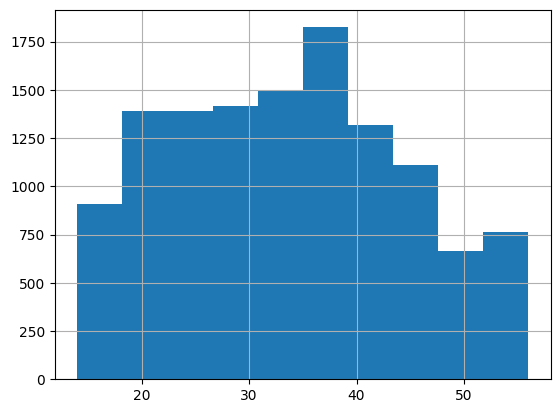

In [5]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = df_copy.age > 100
df_copy = df_copy[~invalid_data]

## age = -500 se considera como nulo e imputamos
imp_mean = SimpleImputer(missing_values=-500, strategy='mean')
df_copy.age = imp_mean.fit_transform(df_copy.age.values.reshape(-1,1))

## Graficamos la nueva distribución de age
df_copy.age.hist()
plt.show()

#### 2.1.2. $\texttt{annual_income}$
Intentamos eliminar los valores muy grandes, pero evitando eliminar una cantidad excesiva de datos

In [6]:
len(df[df.annual_income<0]), len(df[df.annual_income>2*1e5])

(0, 114)

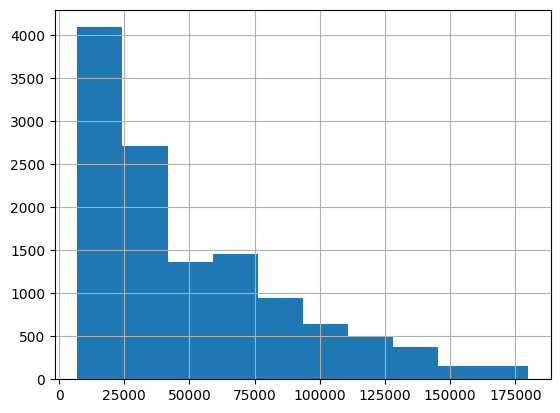

In [7]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = df_copy.annual_income > 2 * 1e5
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de annual_income
df_copy.annual_income.hist()
plt.show()

#### 2.1.3. $\texttt{num_bank_accounts}$

In [8]:
len(df[df.num_bank_accounts<0]), len(df[df.num_bank_accounts>15])

(4, 167)

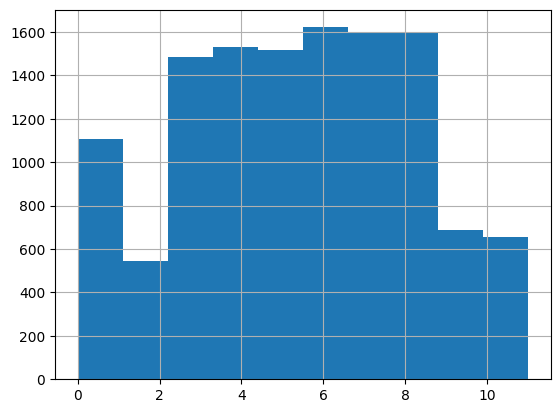

In [9]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.num_bank_accounts > 15) | (df_copy.num_bank_accounts < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de num_bank_accounts
df_copy.num_bank_accounts.hist()
plt.show()

#### 2.1.4. $\texttt{num_credit_card}$

In [10]:
len(df[df.num_credit_card<0]), len(df[df.num_credit_card>15])

(0, 296)

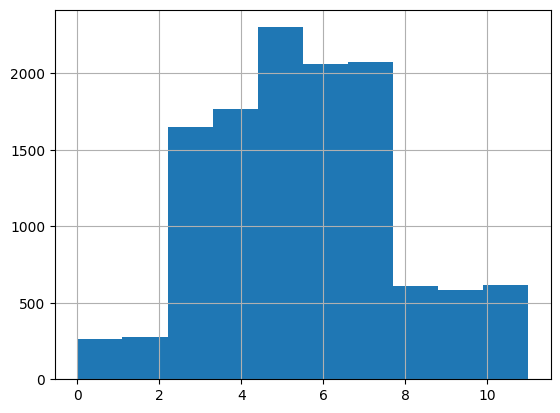

In [11]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = df_copy.num_credit_card > 15
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de num_credit_card
df_copy.num_credit_card.hist()
plt.show()

#### 2.1.5. $\texttt{interest_rate}$

In [12]:
len(df[df.interest_rate<0]), len(df[df.interest_rate>40])

(0, 270)

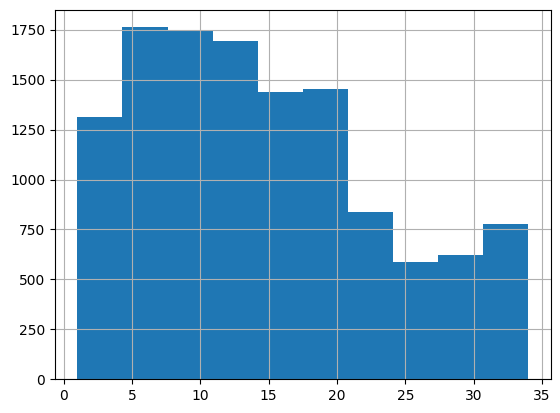

In [13]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = df_copy.interest_rate > 40
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de interest_rate
df_copy.interest_rate.hist()
plt.show()

#### 2.1.6. $\texttt{num_of_loan}$
De manera similar a $\texttt{age}$ solo tenemos un valor negativo (-100), por lo que imputaremos como la media.

In [14]:
len(df[df.num_of_loan<0]), len(df[df.num_of_loan>20])

(500, 66)

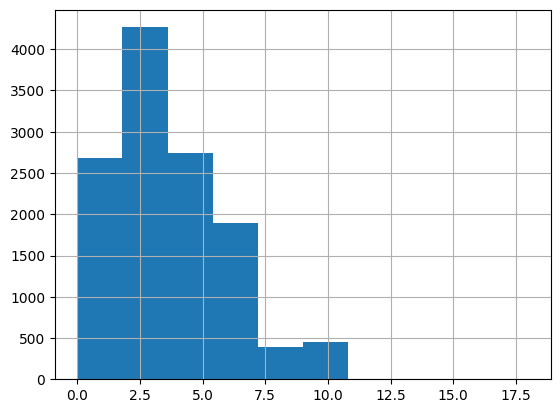

In [15]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = df_copy.num_of_loan > 20
df_copy = df_copy[~invalid_data]

## num_of_loan = -100 se considera como nulo e imputamos
imp_mean = SimpleImputer(missing_values=-100, strategy='mean')
df_copy.num_of_loan = imp_mean.fit_transform(df_copy.num_of_loan.values.reshape(-1,1))

## Graficamos la nueva distribución de num_of_loan
df_copy.num_of_loan.hist()
plt.show()

#### 2.1.7. $\texttt{𝚗𝚞𝚖⎯𝚘𝚏⎯𝚍𝚎𝚕𝚊𝚢𝚎𝚍⎯𝚙𝚊𝚢𝚖𝚎𝚗𝚝}$
En este caso los valores negativos son entre -3 y -1, por lo que trataremos estos datos como valores nulos y los eliminaremos.

In [16]:
len(df[df.num_of_delayed_payment<0]), len(df[df.num_of_delayed_payment>40])

(81, 97)

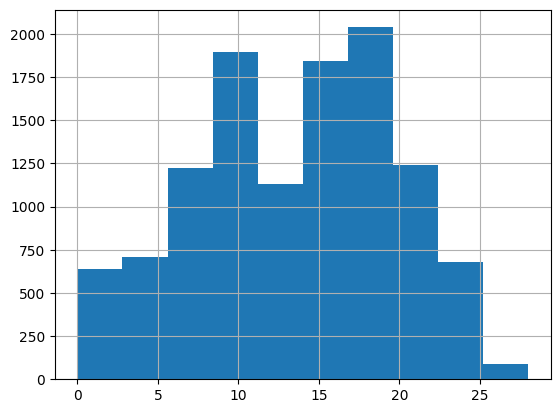

In [17]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.num_of_delayed_payment > 40) | (df_copy.num_of_delayed_payment < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de num_of_delayed_payment
df_copy.num_of_delayed_payment.hist()
plt.show()

#### 2.1.8. $\texttt{num_credit_inquiries}$

In [18]:
len(df[df.num_credit_inquiries<0]), len(df[df.num_credit_inquiries>20])

(0, 188)

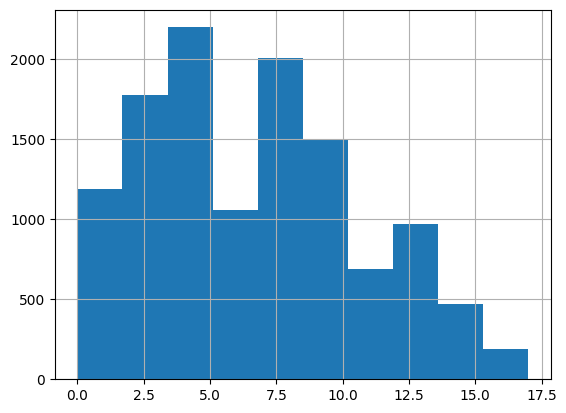

In [19]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.num_credit_inquiries > 20)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de num_credit_inquiries
df_copy.num_credit_inquiries.hist()
plt.show()

#### 2.1.9. $\texttt{total_emi_per_month}$
En este caso vemos que hay muchos valores, pero hay una concentración alta en 0, por lo que habría que estudiar el comportamiento de los modelos al eliminar esta variable.

In [20]:
len(df[df.total_emi_per_month<0]), len(df[df.total_emi_per_month>5*1e4])

(0, 161)

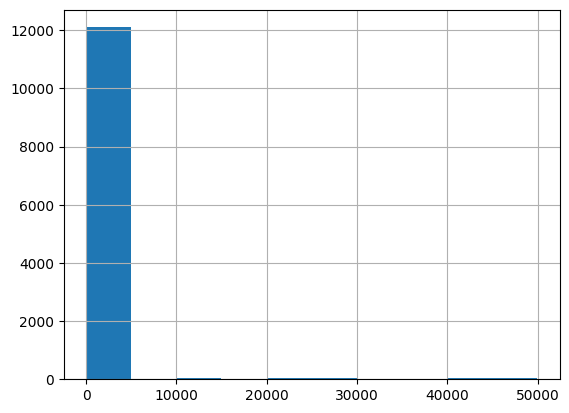

In [21]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.total_emi_per_month > 5 * 1e4)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de total_emi_per_month
df_copy.total_emi_per_month.hist()
plt.show()

#### 2.1.10. $\texttt{amount_invested_monthly}$
En este caso tenemos que el valor máximo 10000 aparece repetido 540 veces mientras que el segundo valor máximo es 1977.326102, lo que puede indicar que este valor es la cantidad de máxima que se puede invertir mensualmente. No es claro si eliminamos estos valores, pero ciertamente son valores atípicos.

In [22]:
len(df[df.amount_invested_monthly<0]), len(df[df.amount_invested_monthly>1e4])

(0, 0)

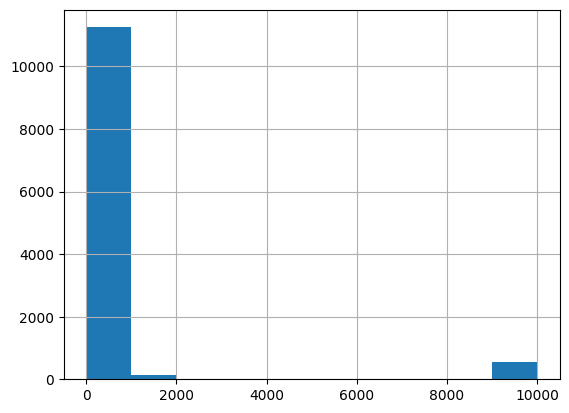

In [23]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.amount_invested_monthly > 1e4)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de amount_invested_monthly
df_copy.amount_invested_monthly.hist()
plt.show()

#### 2.1.11. $\texttt{monthly_balance}$
En este caso solo basta eliminar el valor negativo presente.

In [24]:
len(df[df.monthly_balance<0])

1

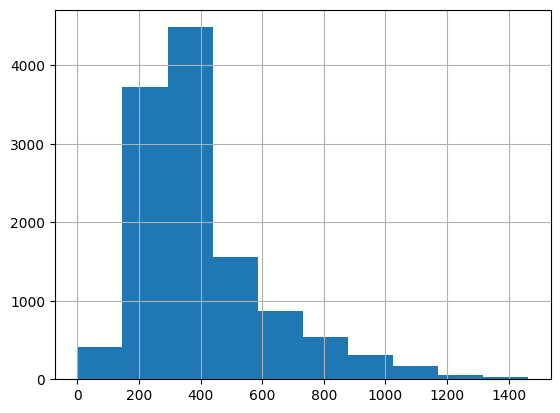

In [25]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.monthly_balance > 1e4) | (df_copy.monthly_balance < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de monthly_balance
df_copy.monthly_balance.hist()
plt.show()

#### 2.1.12. $\texttt{delay_from_due_date}$

In [26]:
len(df[df.delay_from_due_date<0])

88

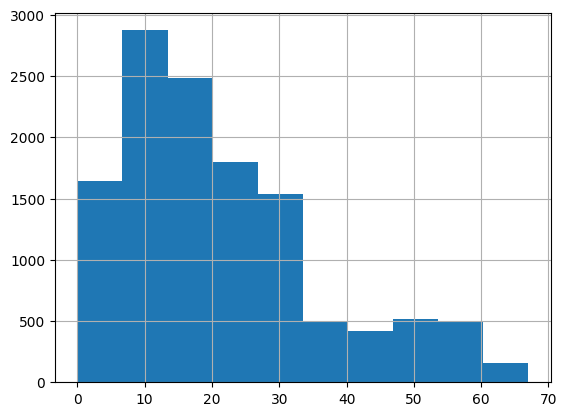

In [27]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.delay_from_due_date < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de delay_from_due_date
df_copy.delay_from_due_date.hist()
plt.show()

#### 2.1.13. $\texttt{changed_credit_limit}$

In [28]:
len(df[df.changed_credit_limit<0])

204

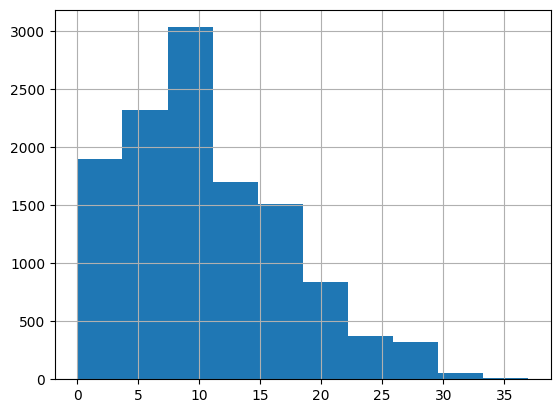

In [29]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.changed_credit_limit < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de changed_credit_limit
df_copy.changed_credit_limit.hist()
plt.show()

#### 2.1.14. $\texttt{credit_history_age}$

In [30]:
len(df[df.credit_history_age<0])

0

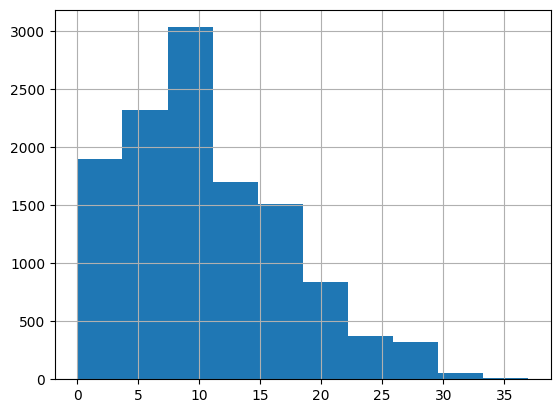

In [31]:
df_copy = df.copy()

## Eliminamos datos inválidos
invalid_data = (df_copy.changed_credit_limit < 0)
df_copy = df_copy[~invalid_data]

## Graficamos la nueva distribución de changed_credit_limit
df_copy.changed_credit_limit.hist()
plt.show()

#### 2.1.15. $\texttt{occupation}$
En este caso hay 880 valores nulos codificados por '_______', así que imputaremos estos registros como 'no informado'.

In [32]:
(df.occupation == '_______').sum()

880

In [33]:
df_copy = df.copy()
df_copy.loc[df_copy.occupation == '_______', 'occupation'] = 'Not informed'

#### 2.1.16. $\texttt{payment_of_min_amount}$
En este caso hay 1438 valores nulos codificados por 'NM', así que imputaremos estos registros como 'no informado'.

In [34]:
(df.payment_of_min_amount == 'NM').sum()

1438

In [35]:
df_copy = df.copy()
df_copy.loc[df_copy.payment_of_min_amount == 'NM', 'payment_of_min_amount'] = 'Not informed'

#### 2.1.17. $\texttt{payment_behaviour}$
En este caso hay 998 valores nulos codificados por '!@9#%8', así que imputaremos estos registros como 'no informado'.

In [36]:
df.payment_behaviour.unique()

array(['High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [37]:
(df.payment_behaviour == '!@9#%8').sum()

998

In [38]:
df_copy = df.copy()
df_copy.loc[df_copy.payment_behaviour == '!@9#%8', 'payment_behaviour'] = 'Not informed'

Las variables $\texttt{monthly_inhand_salary}$, $\texttt{credit_utilization_ratio}$, $\texttt{outstanding_debt}$ y $\texttt{credit_history_age}$ están limpias.

In [39]:
# Definimos el Scaler que utilizaremos

cat_cols = [
    'occupation',
    'payment_of_min_amount',
    'payment_behaviour',
]

robust_num_cols = [
    'annual_income',
    'total_emi_per_month',
    'amount_invested_monthly',
    'outstanding_debt',
]

std_num_cols = [
    'age',
    'num_bank_accounts',
    'num_credit_card',
    'interest_rate',
    'num_of_loan',
    'num_of_delayed_payment',
    'num_credit_inquiries',
    'monthly_inhand_salary',
    'monthly_balance',
    'delay_from_due_date',
    'changed_credit_limit',
    'credit_utilization_ratio',
    'credit_history_age',
]

num_cols = robust_num_cols + std_num_cols
all_cols = num_cols + cat_cols

## 3. Preparación de Datos

### 3.1. Preprocesamiento con `ColumnTransformer`

Definimos una función que se encargue de la limpieza mencionada en la sección 2.

In [40]:
def clean_data(dataframe_in):
    dataframe_out = dataframe_in.copy()
    
    ## Aplicamos los filtros en la sección anterior
    invalid_data = (
        (dataframe_out.age > 100) |
        (dataframe_out.annual_income > 2 * 1e5) |
        (dataframe_out.num_bank_accounts > 15) | (dataframe_out.num_bank_accounts < 0) |
        (dataframe_out.num_credit_card > 15) |
        (dataframe_out.interest_rate > 40) |
        (dataframe_out.num_of_loan > 20) |
        (dataframe_out.num_of_delayed_payment > 40) | (dataframe_out.num_of_delayed_payment < 0) |
        (dataframe_out.num_credit_inquiries > 20) |
        (dataframe_out.total_emi_per_month > 5 * 1e4) |
        (dataframe_out.amount_invested_monthly > 1e4) |
        (dataframe_out.monthly_balance > 1e4) | (dataframe_out.monthly_balance < 0) |
        (dataframe_out.delay_from_due_date < 0) |
        (dataframe_out.changed_credit_limit < 0) |
        (dataframe_out.changed_credit_limit < 0) 
    )
    
    ## Eliminamos datos inválidos
    dataframe_out = dataframe_out[~invalid_data]
    
    ## Imputamos
    imp_age = SimpleImputer(missing_values=-500, strategy='mean')
    dataframe_out.age = imp_age.fit_transform(dataframe_out.age.values.reshape(-1,1))

    imp_num_of_loan = SimpleImputer(missing_values=-100, strategy='mean')
    dataframe_out.num_of_loan = imp_num_of_loan.fit_transform(dataframe_out.num_of_loan.values.reshape(-1,1))
    
    # CATEGORICAL VARIABLES
    dataframe_out.loc[dataframe_out.occupation == '_______', 'occupation'] = 'Not informed'
    dataframe_out.loc[dataframe_out.payment_of_min_amount == 'NM', 'payment_of_min_amount'] = 'Not informed'
    dataframe_out.loc[dataframe_out.payment_behaviour == '!@9#%8', 'payment_behaviour'] = 'Not informed'
    
    return dataframe_out

In [41]:
# Registros posterior a la limpieza
df = clean_data(df)
X, y = df[all_cols], df['credit_score']
len(X)

10688

In [42]:
# Preprocesamos
preprocessing = ColumnTransformer(
    transformers=[
        ('cat_cols', OneHotEncoder(sparse_output=False), cat_cols),
        ('robust_num_cols', RobustScaler(), robust_num_cols),
        ('std_num_cols', StandardScaler(), std_num_cols),
    ],
    remainder='passthrough'
).set_output(transform="pandas")

In [43]:
preprocessing.fit_transform(X)

cat_cols__occupation_Accountant  cat_cols__occupation_Architect  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   
...                                ...                             ...   
12495                              0.0                             0.0   
12496                              0.0                             0.0   
12497                              0.0                             0.0   
12498                              0.0                             1.0   
12499                              0.0                             0.0   

       cat_cols__occupation_Developer  cat_cols__occupation_Doctor  \
0                                 0.0                          0.0   
1                                 0.0                          0.0   
2                                 0.0                          0.0   
3                                 0.0                          0.0   
4                                 1.0                          0.0   
...                               ...                          ...   
12495                             0.0                          0.0   
12496                             0.0                          0.0   
12497                             0.0                          0.0   
12498                             0.0                          0.0   
12499                             0.0                          0.0   

       cat_cols__occupation_Engineer  cat_cols__occupation_Entrepreneur  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                1.0                                0.0   
3                                0.0                                1.0   
4                                0.0                                0.0   
...                              ...                                ...   
12495                            0.0                                0.0   
12496                            0.0                                0.0   
12497                            0.0                                0.0   
12498                            0.0                                0.0   
12499                            0.0                                0.0   

       cat_cols__occupation_Journalist  cat_cols__occupation_Lawyer  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   
...                                ...                          ...   
12495                              0.0                          1.0   
12496                              0.0                          0.0   
12497                              0.0                          0.0   
12498                              0.0                          0.0   
12499                              0.0                          0.0   

       cat_cols__occupation_Manager  cat_cols__occupation_Mechanic  ...  \
0                               0.0                            0.0  ...   
1                               0.0                            0.0  ...   
2                               0.0                            0.0  ...   
3                               0.0                            0.0  ...   
4                               0.0                            0.0  ...   
...                             ...                            ...  ...  

### 3.2. Datos nulos

Podemos ver que hay columnas con valores nulos.

In [44]:
X.isna().sum().sort_values(ascending=False)

monthly_inhand_salary       1660
credit_history_age           958
num_of_delayed_payment       724
amount_invested_monthly      486
monthly_balance              298
changed_credit_limit         226
num_credit_inquiries         225
payment_of_min_amount          0
occupation                     0
credit_utilization_ratio       0
delay_from_due_date            0
annual_income                  0
total_emi_per_month            0
num_of_loan                    0
interest_rate                  0
num_credit_card                0
num_bank_accounts              0
age                            0
outstanding_debt               0
payment_behaviour              0
dtype: int64

In [45]:
X[X.num_of_delayed_payment.isna()]

annual_income  total_emi_per_month  amount_invested_monthly  \
33         58317.000           149.897199                59.955987   
49         95956.500            95.521629               552.110683   
134        24585.550            30.447777                66.076883   
156        15488.885             0.000000               155.918667   
171         9783.245            52.839134                68.580856   
...              ...                  ...                      ...   
12465      36817.940            86.809918               206.514331   
12469      34493.920           110.383098               348.266986   
12477      65858.480           261.201218               198.513522   
12482      10692.160             0.000000                71.941752   
12495      42903.790            34.975457               115.184984   

       outstanding_debt        age  num_bank_accounts  num_credit_card  \
33                98.97  44.000000                  8                5   
49              1079.73  38.000000                  8                4   
134              195.38  46.000000                  3                4   
156             1287.59  33.477404                  0                4   
171             1684.06  30.000000                  8                6   
...                 ...        ...                ...              ...   
12465           1019.46  53.000000                  5                4   
12469           4138.67  24.000000                  9               10   
12477           2344.57  20.000000                  7                7   
12482           1350.85  43.000000                  8                4   
12495           1079.48  19.000000                  0                4   

       interest_rate  num_of_loan  num_of_delayed_payment  \
33                 9          6.0                     NaN   
49                11          2.0                     NaN   
134               14          2.0                     NaN   
156                4          0.0                     NaN   
171               29          8.0                     NaN   
...              ...          ...                     ...   
12465              5          3.0                     NaN   
12469             24          7.0                     NaN   
12477             30          5.0                     NaN   
12482             16          0.0                     NaN   
12495              6          1.0                     NaN   

       num_credit_inquiries  monthly_inhand_salary  monthly_balance  \
33                     10.0            4664.750000       506.621813   
49                      2.0            8279.375000       450.305188   
134                     1.0            2316.795833       405.154923   
156                     9.0            1273.740417       261.455374   
171                     7.0                    NaN       259.407052   
...                     ...                    ...              ...   
12465                   5.0            3198.161667              NaN   
12469                  13.0            3043.493333              NaN   
12477                  13.0            5421.206667              NaN   
12482                   4.0             817.013333              NaN   
12495                   1.0            3468.315833              NaN   

       delay_from_due_date  changed_credit_limit  credit_utilization_ratio  \
33                      22                 16.58                 36.763665   
49                      23                 11.94                 41.341414   
134                      9                 11.35                 31.151161   
156                     10                  1.38                 39.432106   
171                     45                  7.75                 24.464831   
...                    ...                   ...                       ...   
12465                    9                  3.98                 35.270663   
12469                   20                 25.16                 30

Como la cantidad de valores nulos es alta para las columnas presentes no podemos simplemente eliminarlas. Notemos que todas las columnas con valores nulos son de tipo numéricas, por lo que imputaremos los valores nulos por la media para los casos donde la distribución no sea tan asimétrica, y por la mediana en caso contrario. A saber, solo usaremos la mediana para $\texttt{amount_invested_monthly}$. 

In [46]:
imp_median = SimpleImputer(strategy='median')
imp_mean = SimpleImputer(strategy='mean')

mean_cols = [
    'num_of_delayed_payment', 
    'num_credit_inquiries', 
    'monthly_inhand_salary', 
    'monthly_balance',
    'changed_credit_limit',
    'credit_history_age',
]

median_cols = [
    'amount_invested_monthly',
]

X.loc[:, median_cols] = imp_median.fit_transform(X[median_cols])
X.loc[:, mean_cols] = imp_median.fit_transform(X[mean_cols])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
X.isna().sum().sort_values(ascending=False)

annual_income               0
total_emi_per_month         0
payment_of_min_amount       0
occupation                  0
credit_history_age          0
credit_utilization_ratio    0
changed_credit_limit        0
delay_from_due_date         0
monthly_balance             0
monthly_inhand_salary       0
num_credit_inquiries        0
num_of_delayed_payment      0
num_of_loan                 0
interest_rate               0
num_credit_card             0
num_bank_accounts           0
age                         0
outstanding_debt            0
amount_invested_monthly     0
payment_behaviour           0
dtype: int64

### 3.3. Holdout
Para los siguientes modelos utilizaremos 70% para entrenamiento, 20% para validación y 10% para prueba.

In [48]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.33, stratify=y_valtest, random_state=42)

In [49]:
X_train

annual_income  total_emi_per_month  amount_invested_monthly  \
7371       17902.265            16.245051                32.572508   
6629       35851.390         32449.000000               144.001923   
3881       37159.000            74.603427                26.735742   
8666       69712.200           275.125859               459.873370   
10203      29280.440           220.320169                93.960884   
...              ...                  ...                      ...   
9593      129695.720           192.326098               667.941034   
3847       14132.320            51.749265               155.435014   
8763       29357.850            45.650521                76.346405   
11002      30393.470            13.590246               133.368385   
11865      35022.220            21.214576               259.345113   

       outstanding_debt   age  num_bank_accounts  num_credit_card  \
7371             450.32  20.0                  5                4   
6629             926.99  37.0                  6                4   
3881            1051.35  31.0                  5                4   
8666            1638.94  42.0                  8                7   
10203             93.91  24.0                  2                5   
...                 ...   ...                ...              ...   
9593            1446.60  50.0                  1                4   
3847            4632.52  36.0                  6                9   
8763             848.04  37.0                  5                4   
11002            648.66  15.0                  3                7   
11865           1000.44  42.0                  3                5   

       interest_rate  num_of_loan  num_of_delayed_payment  \
7371               5          2.0                    12.0   
6629               5          2.0                    15.0   
3881              15          4.0                    20.0   
8666               5          5.0                    18.0   
10203              3          0.0                     3.0   
...              ...          ...                     ...   
9593               1          2.0                     8.0   
3847              34          8.0                    17.0   
8763              17          3.0                    11.0   
11002              8          1.0                    13.0   
11865              4          1.0                    11.0   

       num_credit_inquiries  monthly_inhand_salary  monthly_balance  \
7371                    8.0            1306.855417       341.867983   
6629                    8.0            2762.615833       338.740565   
3881                    8.0            3068.619167       468.619165   
8666                    8.0            5841.350000       119.135771   
10203                   5.0            2237.716498       401.842783   
...                     ...                    ...              ...   
9593                    3.0           10589.976667       478.730535   
3847                    6.0            1205.693333       203.385054   
8763                    4.0            2665.487500       394.551824   
11002                   7.0            2760.789167       365.623603   
11865                   6.0            2859.518333       295.392143   

       delay_from_due_date  changed_credit_limit  credit_utilization_ratio  \
7371                     9                  3.55                 28.394498   
6629                     9                  9.10                 30.571299   
3881                    16                 13.43                 36.509583   
8666                    29                 16.86                 37.676992   
10203                   28                 11.93                 25.862461   
...                    ...                   ...                       ...   
9593                    11                  4.34                 33.211262   
3847                    50                 23.75                 36.451288   
8763                    19                 12.09 

In [50]:
X_val

annual_income  total_emi_per_month  amount_invested_monthly  \
2730       42122.280            61.362803                56.254464   
7153       15427.215            48.816834               126.942549   
5057       45034.340         33977.000000               139.082986   
6977      122053.200           388.909784               769.682994   
4587       69779.800           254.968195               627.529103   
...              ...                  ...                      ...   
8758      115324.620           199.251260               380.248607   
2109        9045.110            24.816052                37.500719   
12159      19700.290            59.957811             10000.000000   
9869       18261.360            26.024072                70.042373   
8984       61796.000           117.462549               129.501390   

       outstanding_debt   age  num_bank_accounts  num_credit_card  \
2730             775.54  24.0                  2                6   
7153             966.45  44.0                  0                3   
5057              36.56  47.0                  4                7   
6977            1292.35  32.0                  8                7   
4587            2349.79  39.0                  3                6   
...                 ...   ...                ...              ...   
8758            1316.45  34.0                  2                5   
2109            2575.87  19.0                 10               10   
12159             15.18  41.0                  8                4   
9869            2305.16  36.0                  5                3   
8984            2472.48  33.0                  3                5   

       interest_rate  num_of_loan  num_of_delayed_payment  \
2730               5          2.0                     4.0   
7153               8          4.0                     2.0   
5057               8          2.0                    13.0   
6977              12          5.0                    18.0   
4587              12          5.0                    14.0   
...              ...          ...                     ...   
8758               8          4.0                     6.0   
2109              34          4.0                    19.0   
12159             15          4.0                     8.0   
9869               9          3.0                    12.0   
8984              11          3.0                    15.0   

       num_credit_inquiries  monthly_inhand_salary  monthly_balance  \
2730                    7.0            3211.190000       453.501733   
7153                    8.0            1253.601250       239.600742   
5057                    0.0            4021.861667       464.376787   
6977                    6.0           10370.100000       158.417222   
4587                    7.0            5695.983333       337.840982   
...                     ...                    ...              ...   
8758                    3.0            9772.385000       657.738633   
2109                   10.0             981.759167       305.859145   
12159                   2.0            3068.619167       254.646708   
9869                    9.0            1485.780000       312.511555   
8984                    7.0            3068.619167       495.602727   

       delay_from_due_date  changed_credit_limit  credit_utilization_ratio  \
2730                     1                  0.53                 39.299338   
7153                    13                 11.22                 33.439423   
5057                     7                  6.30                 26.657627   
6977                    19                  9.42                 29.690040   
4587                    27                 18.99                 38.766958   
...                    ...                   ...                       ...   
8758                     9                  5.50                 40.506395   
2109                    25                  6.91                 33.962098   
12159                   25                 17.75 

In [51]:
X_test

annual_income  total_emi_per_month  amount_invested_monthly  \
9387       91771.290           176.579352             10000.000000   
10010      81998.840           260.570837               119.751732   
2691       48518.880           117.950452                90.597786   
10879      11330.965             5.994046                79.064848   
9029       25415.420            12.232103                32.587349   
...              ...                  ...                      ...   
5385       99858.150           190.614256                70.754942   
1500      119312.080           800.007565               659.201754   
1908       19296.415            47.524802               130.068975   
7114       51660.420            94.536450                56.210512   
8127       18426.025            78.428286                55.723115   

       outstanding_debt   age  num_bank_accounts  num_credit_card  \
9387            1266.35  38.0                  4                2   
10010           3520.62  21.0                  7                6   
2691            3771.66  39.0                  7                9   
10879           1154.16  41.0                  3                7   
9029            1272.08  32.0                  7                6   
...                 ...   ...                ...              ...   
5385            1392.72  41.0                  3                8   
1500            1200.53  39.0                  5                5   
1908            1278.11  22.0                  1                5   
7114             358.90  33.0                  6                6   
8127             364.10  22.0                  6                6   

       interest_rate  num_of_loan  num_of_delayed_payment  \
9387               5          3.0                    10.0   
10010             28          6.0                    17.0   
2691              25          5.0                    14.0   
10879              7          1.0                    20.0   
9029              11          1.0                    14.0   
...              ...          ...                     ...   
5385               8          4.0                     9.0   
1500              17          4.0                    15.0   
1908              12          3.0                    11.0   
7114              10          4.0                    17.0   
8127              14          6.0                    19.0   

       num_credit_inquiries  monthly_inhand_salary  monthly_balance  \
9387                   11.0            7547.607500       476.382887   
10010                  17.0            6900.236667       549.701097   
2691                   11.0            4213.240000       452.775761   
10879                   4.0            1115.247083       316.465814   
9029                    5.0            2339.951667       439.175714   
...                     ...                    ...              ...   
5385                    5.0            8310.512500       809.682052   
1500                    1.0            9538.088084       279.943264   
1908                    3.0            1845.034583       276.909681   
7114                    8.0            4311.035000       530.356538   
8127                    9.0            3068.619167       297.198807   

       delay_from_due_date  changed_credit_limit  credit_utilization_ratio  \
9387                    32                 17.13                 39.370930   
10010                   32                 26.08                 30.987257   
2691                    14                  3.48                 29.792139   
10879                   16                  8.01                 33.535335   
9029                    18                  8.45                 29.811749   
...                    ...                   ...                       ...   
5385                    18                  9.43                 25.778877   
1500                    24                  2.27                 37.141650   
1908                     2                  1.11 

## 4. Baseline

In [52]:
# Definimos clasificadores
classifiers = [
    ('Dummy', DummyClassifier(strategy='stratified')),
    ('Logistic', LogisticRegression(max_iter=1000, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42, verbose=-1)),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Diccionario para guardar resultados y modelos
f1_score_dict = {}
precision_score_dict = {}
time_dict = {}

# Iteramos sobre clasificadores
for (name, classifier) in classifiers:
    # Definimos la Pipeline para cada modelo
    pipe = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', classifier)
    ])
    
    # Entrenamos
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    
    # Predecimos
    y_pred = pipe.predict(X_val)
    
    # Reportamos 
    display(Markdown(f'### {name}'))
    print(classification_report(y_val, y_pred))
    
    # Guardamos métrica y tiempo de ejecución
    f1_score_dict[name] = round(f1_score(y_val, y_pred, average='macro'), 2)
    time_dict[name] = round(end_time - start_time, 2)
    
    precision_class_1 = precision_score(y_val, y_pred, labels=[1], average='macro')
    precision_score_dict[name] = round(precision_class_1, 2)

### Dummy

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1519
           1       0.29      0.28      0.29       629

    accuracy                           0.59      2148
   macro avg       0.50      0.50      0.50      2148
weighted avg       0.58      0.59      0.59      2148



### Logistic

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1519
           1       0.61      0.39      0.48       629

    accuracy                           0.75      2148
   macro avg       0.70      0.64      0.66      2148
weighted avg       0.73      0.75      0.73      2148



### KNN

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1519
           1       0.60      0.46      0.52       629

    accuracy                           0.75      2148
   macro avg       0.70      0.67      0.68      2148
weighted avg       0.74      0.75      0.74      2148



### Decision Tree

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1519
           1       0.48      0.48      0.48       629

    accuracy                           0.69      2148
   macro avg       0.63      0.63      0.63      2148
weighted avg       0.70      0.69      0.69      2148



### SVM

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1519
           1       0.59      0.38      0.46       629

    accuracy                           0.74      2148
   macro avg       0.69      0.63      0.65      2148
weighted avg       0.72      0.74      0.72      2148



### Random Forest

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1519
           1       0.65      0.49      0.56       629

    accuracy                           0.77      2148
   macro avg       0.73      0.69      0.70      2148
weighted avg       0.76      0.77      0.76      2148



### LightGBM

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1519
           1       0.65      0.52      0.58       629

    accuracy                           0.78      2148
   macro avg       0.73      0.70      0.71      2148
weighted avg       0.77      0.78      0.77      2148



### XGBoost

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1519
           1       0.64      0.51      0.57       629

    accuracy                           0.77      2148
   macro avg       0.73      0.70      0.71      2148
weighted avg       0.76      0.77      0.77      2148



In [53]:
data = {
    'Modelo': time_dict.keys(),
    'F1 score': f1_score_dict.values(),
    'Precision': precision_score_dict.values(),
    'Tiempo de entrenamiento': time_dict.values()
}

results_df = pd.DataFrame(data)

# Ordenamos por mayor F1 score y Precision, y menor Tiempo de entrenamiento
sorting_order = ['F1 score', 'Precision', 'Tiempo de entrenamiento']
sorting_direction = [False, False, True]

results_df = results_df.sort_values(by=sorting_order, ascending=sorting_direction)
results_df

Modelo  F1 score  Precision  Tiempo de entrenamiento
6       LightGBM      0.71       0.65                     0.29
7        XGBoost      0.71       0.64                     1.71
5  Random Forest      0.70       0.65                     2.29
2            KNN      0.68       0.60                     0.02
1       Logistic      0.66       0.61                     0.23
4            SVM      0.65       0.59                     1.88
3  Decision Tree      0.63       0.48                     0.21
0          Dummy      0.50       0.29                     0.02

Podemos ver que todos los modelos son mejores que el azar, siendo el de peor desempeño el Decision Tree. En este caso tuvimos tres modelos que alcanzaron un F1-score sobre 0.7: LightGBM, RandomForest y XGBoost, todos modelos basados en bagging de árboles. Como nos interesa más obtener un Precision alto para la clase 1, entonces descartamos XGBoost. Por último, LightGBM resultó ser el que además tiene un tiempo de entrenamiento significativamente menor, por lo que podemos decir que este fue el mejor modelo para nuestro problema.

No es sorpresa que los modelos basados en bagging de árboles hayan sido los de mejor desempeño, pues esto se debe precisamente a que se basan en técnicas de boosting donde se utilizan secuencias de clasificadores débiles que se complementan entre sí, logrando un modelo mucho más robusto a la distribución de los datos, sobre todo al desbalance de clases.

Por último, LightGBM está diseñado de manera mucho más eficiente que RandomForest y soporta paralelización por lo que se puede utilizar perfectamente por una grilla de optimización de hiperparámetros sin tener que esperar demasiado tiempo.

## 5. Optimización del modelo

### 5.1. Ajuste de hiperparámetros

Los mejores modelos obtenidos en la sección anterior fueron: LightGMB y XGBoost.

In [54]:
# Definimos la función objetivo para optuna con LightGBM
def objective_function_lgbm(trial):
    # Definimos la grilla
    lgbm_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'num_leaves': trial.suggest_int('num_leaves', 3, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.),
    }

    # Definimos la Pipeline
    pipe_lgbm = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', LGBMClassifier(random_state=42, verbose=-1, **lgbm_grid))
    ])
    
    # Entrenamos y predecimos
    pipe_lgbm.fit(X_train, y_train)
    y_pred = pipe_lgbm.predict(X_val)

    # Calculamos el f1-score
    f1 = f1_score(y_val, y_pred, average='macro')
    
    return f1

In [55]:
# Definimos la función objetivo para optuna con XGBoost
def objective_function_xgb(trial):
    # Definimos la grilla
    xgb_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'max_leaves': trial.suggest_int('max_leaves', 0, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }

    # Definimos la Pipeline
    pipe_xgb = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', XGBClassifier(seed=42, **xgb_grid))
    ])
    
    # Entrenamos y predecimos
    pipe_xgb.fit(X_train, y_train)
    y_pred = pipe_xgb.predict(X_val)

    # Calculamos el f1-score
    f1 = f1_score(y_val, y_pred, average='macro')
    
    return f1

In [56]:
# Definimos el sampler
sampler = TPESampler(seed=42)

# Definimos un study de optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
lgbm_study = optuna.create_study(direction='maximize', sampler=sampler)

# Definimos el tiempo límite de ejecución (5 minutos)
timeout = 5 * 60

# Optimizamos
lgbm_study.optimize(objective_function_lgbm, timeout=timeout, show_progress_bar=True)

   0%|          | 00:00/05:00

In [57]:
# Definimos el sampler
sampler = TPESampler(seed=42)

# Definimos un study de optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
xgb_study = optuna.create_study(direction='maximize', sampler=sampler)

# Definimos el tiempo límite de ejecución (5 minutos)
timeout = 5 * 60

# Optimizamos
xgb_study.optimize(objective_function_xgb, timeout=timeout, show_progress_bar=True)

   0%|          | 00:00/05:00

In [58]:
# Reportamos los resultados
display(Markdown('### LightGBM'))
print(f"Number of trials: {len(lgbm_study.trials)}")
print(f"Best trial F1-score: {lgbm_study.best_value:.4f}")
print(f"Best parameters: {lgbm_study.best_params}")

display(Markdown('### XGBoost'))
print(f"Number of trials: {len(xgb_study.trials)}")
print(f"Best trial F1-score: {xgb_study.best_value:.4f}")
print(f"Best parameters: {xgb_study.best_params}")

### LightGBM

Number of trials: 689
Best trial F1-score: 0.7306
Best parameters: {'learning_rate': 0.024458864969084008, 'n_estimators': 306, 'max_depth': 44, 'num_leaves': 10, 'min_child_weight': 1, 'reg_alpha': 0.5443962498946128, 'reg_lambda': 0.8913055721509617}


### XGBoost

Number of trials: 374
Best trial F1-score: 0.7334
Best parameters: {'learning_rate': 0.04534561896347799, 'n_estimators': 375, 'max_depth': 23, 'max_leaves': 11, 'min_child_weight': 5, 'reg_alpha': 0.9970062659829964, 'reg_lambda': 0.5858565964044932}


Podemos ver que LightGBM efectivamente se entrena más rápido que XGBoost, pudiendo hacer 494 iteraciones en 5 minutos, a diferencia de XGBoost que solo alcanzó 346 iteraciones, sin embargo, esto no impidió que XGBoost obtuviera un mejor F1-score que LightGBM. Lo más interesante de esto es que XGBoost alcanza este desempeño utilizando menos de la mitad de árboles que utiliza LightGBM, por lo que resulta en un modelo más simple y con menos tendencia a sobreajustarse.

### 5.2. Visualizaciones

In [59]:
plot_optimization_history(lgbm_study)

In [60]:
plot_parallel_coordinate(lgbm_study)

In [61]:
plot_param_importances(lgbm_study)

In [62]:
plot_optimization_history(xgb_study)

In [63]:
plot_parallel_coordinate(xgb_study)

In [64]:
plot_param_importances(xgb_study)

De los gráficos podemos observar que XGBoost presenta variaciones ligeras entre iteraciones, mientras que LightGBM es más errático. Además, como se mencionó en la subsección anterior, LightGBM depende mucho más de la cantidad de árboles a utilizar, mientras que XGBoost se preocupa del learning rate y el número máximo de hojas. Con todo esto, podemos decir que XGBoost es el modelo que utilizaremos para nuestro problema de riesgo crediticio.

In [65]:
# Definimos la pipeline con XGBoost y los mejores hiperparámetros
best_model = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', XGBClassifier(seed=42, **xgb_study.best_params)),
])

# Entrenamos
best_model.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Reportamos resultados
display(Markdown(f'### XGBoost con mejores hiperparámetros'))
print(classification_report(y_test, y_pred))

### XGBoost con mejores hiperparámetros

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       749
           1       0.65      0.55      0.59       310

    accuracy                           0.78      1059
   macro avg       0.74      0.71      0.72      1059
weighted avg       0.77      0.78      0.77      1059



## 6. Interpretabilidad

Para intepretar el modelo utilizaremos interpretabilidad a nivel global revisando las características más relevantes para el modelo al momento de clasificar, e interpretabilidad a nivel local revisando instancias aleatorias y comprobar las características más relevantes para esas instancias, con el fin de evitar sesgos y verificar que el modelo sea coherente. Para esto haremos uso de los SHAP values, y como en este caso nuestro modelo está basando en árboles, entonces el cálculo de estos valores no será tan costoso.

### 6.1. Interpretabilidad global

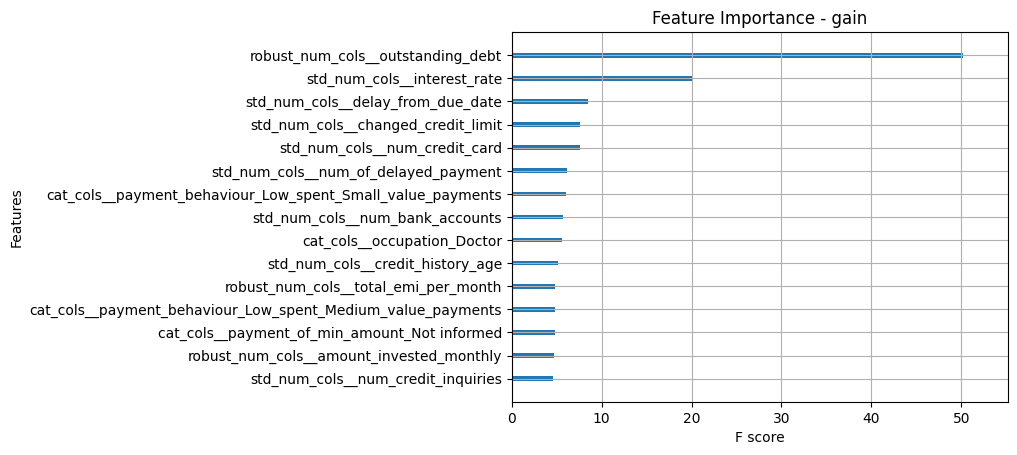

In [66]:
# Ploteamos importancia de features con 'gain'
plot_importance(
    best_model.named_steps['classifier'], 
    importance_type='gain', 
    max_num_features=15,
    show_values=False
)
plt.title(f'Feature Importance - gain')
plt.show()

Podemos ver que la característica más relevante es la deuda actual del cliente, lo que tiene sentido teniendo en cuenta que una persona con menos deudas es más probable que sea un cliente que pague a tiempo, luego tenemos la tasa de interés a la que aplica la persona, lo que es razonable pues a una menor tasa de interés mayor probabilidad de que el cliente pague. Posteriormente tenemos otras características relevantes que involucran el historial crediticio de los clientes como tiempo de retraso, límite de crédito, cantidad de cuentas de crédito. Sin embargo, se pueden ver ciertas características como $\texttt{payment_behaviour}=$Low spent Small value payments o la ocupación Doctor que ven a la persona en lugar de su registro bancario, por lo que se debe profundizar si esto es un problema.

In [67]:
# Procesamos los datos
X_preprocessed = best_model.named_steps['preprocessing'].transform(X)

# Definimos el explainer
explainer = shap.TreeExplainer(best_model.named_steps['classifier'], data=X_preprocessed, model_output='predict_proba')

# Calculamos SHAP values con todos los datos
shap_values = explainer.shap_values(X_preprocessed)

C:\Users\Daniel Minaya Vargas\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning:

[23:05:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

 99%|===================| 10611/10688 [01:56<00:00]        

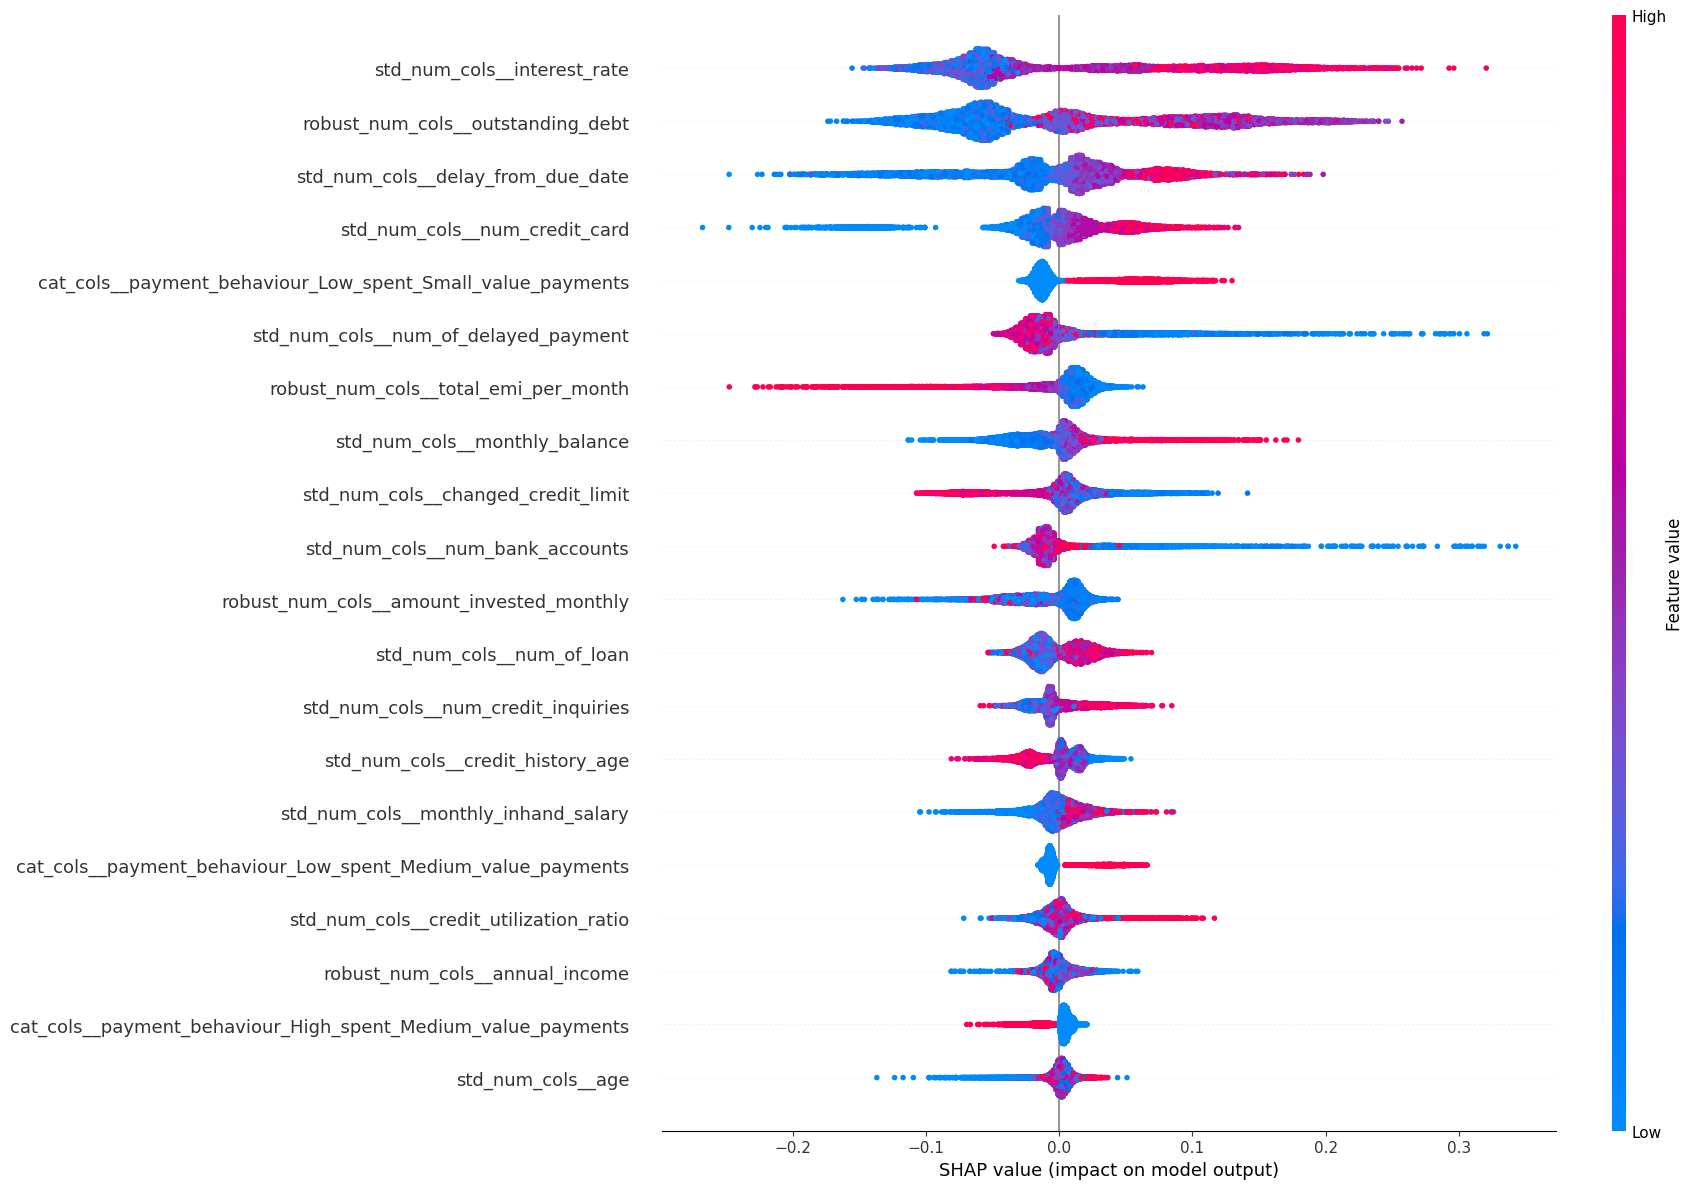

In [68]:
shap.summary_plot(shap_values[1], X_preprocessed, plot_size=(18, 12))

Con el gráfico de SHAP values podemos complementar lo anterior. Vemos que la deuda pendiente presenta mayores valores negativos indicando que un alto valor de esta variable tiene un impacto negativo en la clasificación. Similarmente, un bajo número de tarjetas de crédito tienen un impacto positivo en la clasificación, es decir, es más probable que el cliente no sea riesgoso.

Además, en este gráfico se ve que la variable Low_spend_Small_value_payments no presenta gran problema debido a que no afecta de manera significativa la clasificación hacia alguna de las dos clases.

### 6.2. Interpretabilidad local

In [69]:
np.random.seed(42)
instancias = np.random.randint(0, len(X)-1, size=10)
instancias

array([7270,  860, 5390, 5191, 5734, 6265,  466, 4426, 5578, 8322])

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


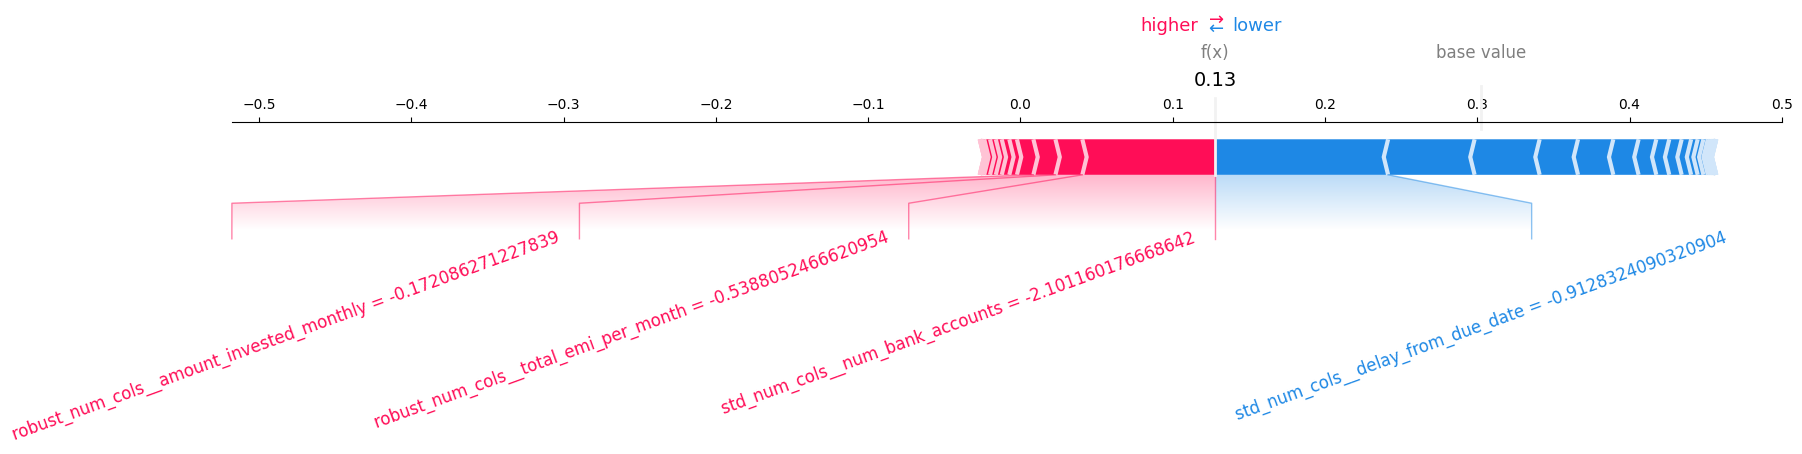

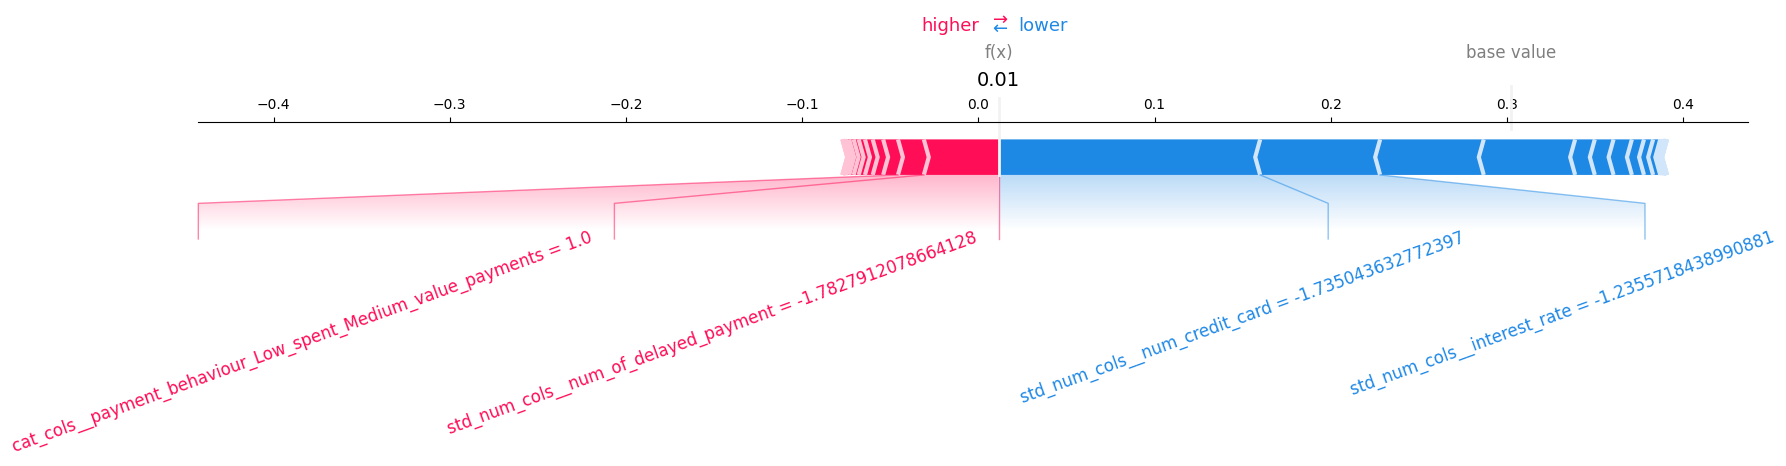

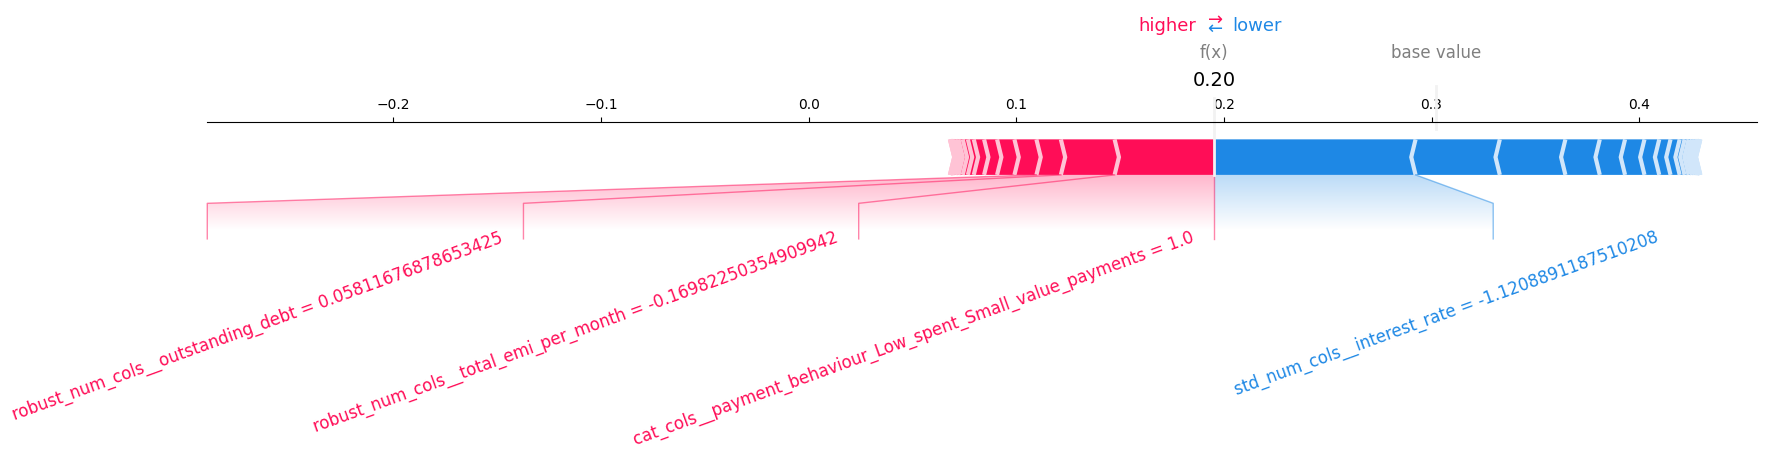

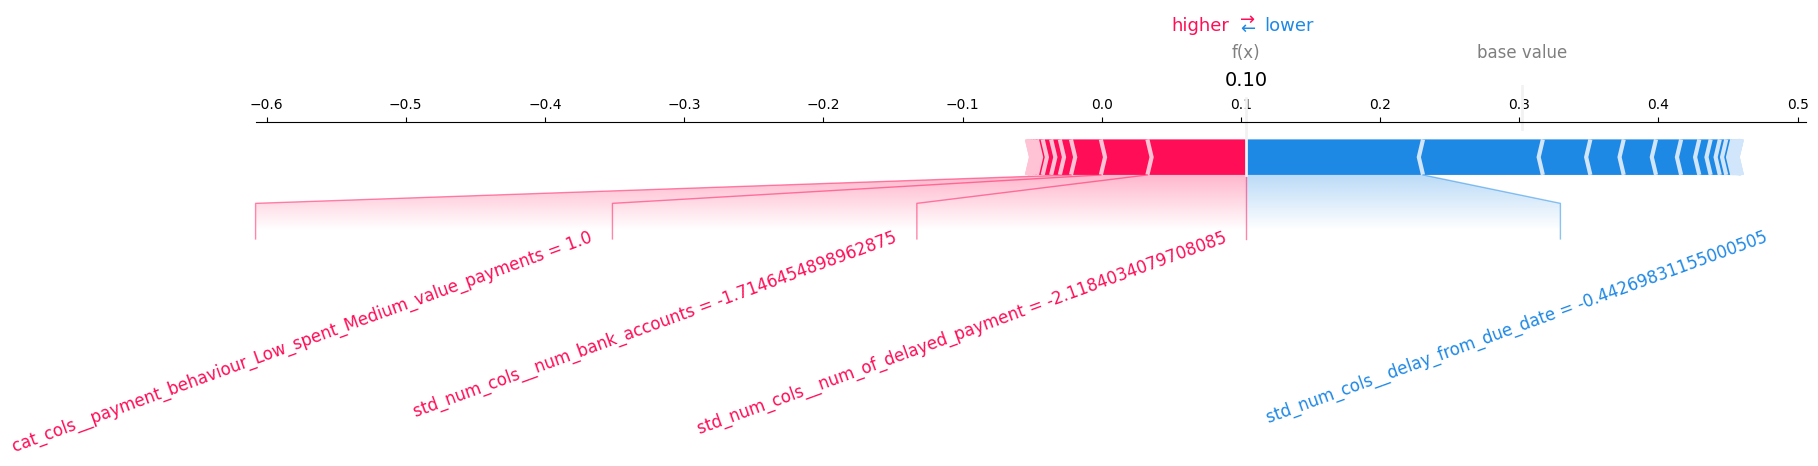

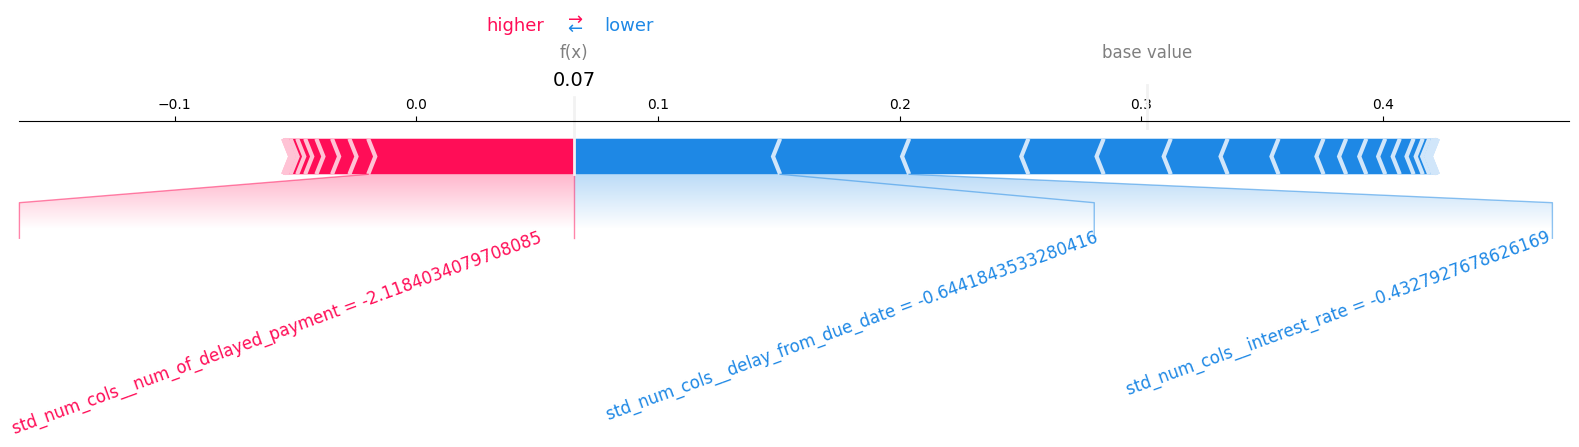

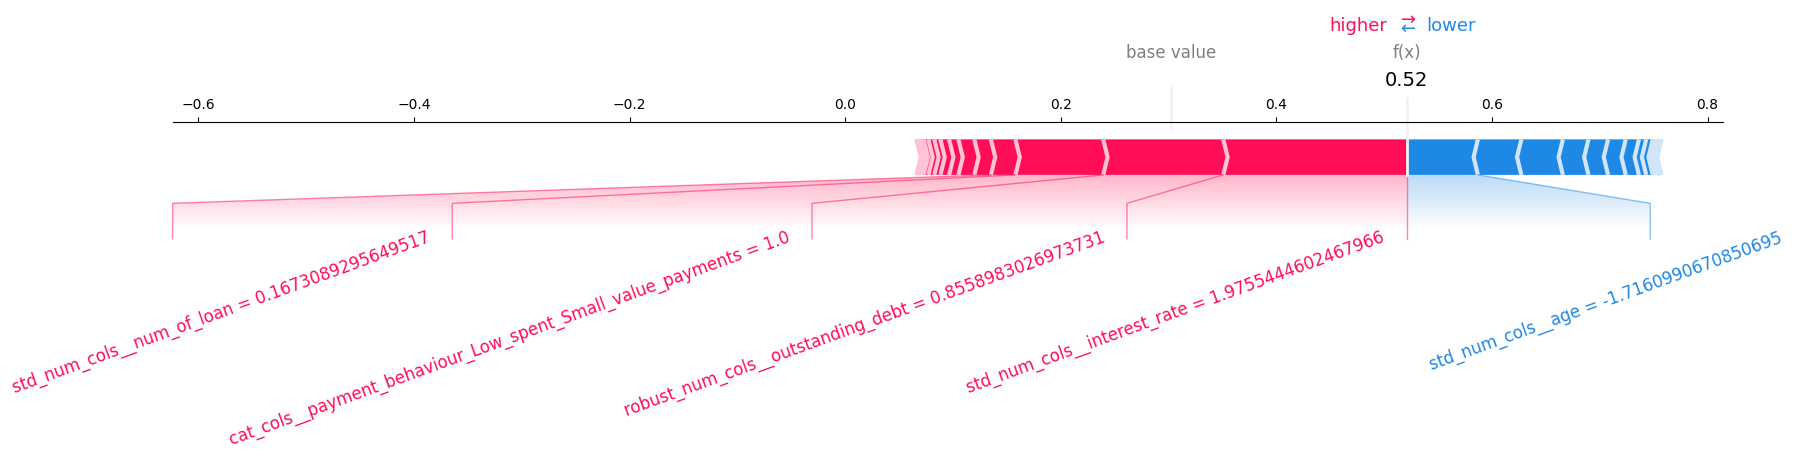

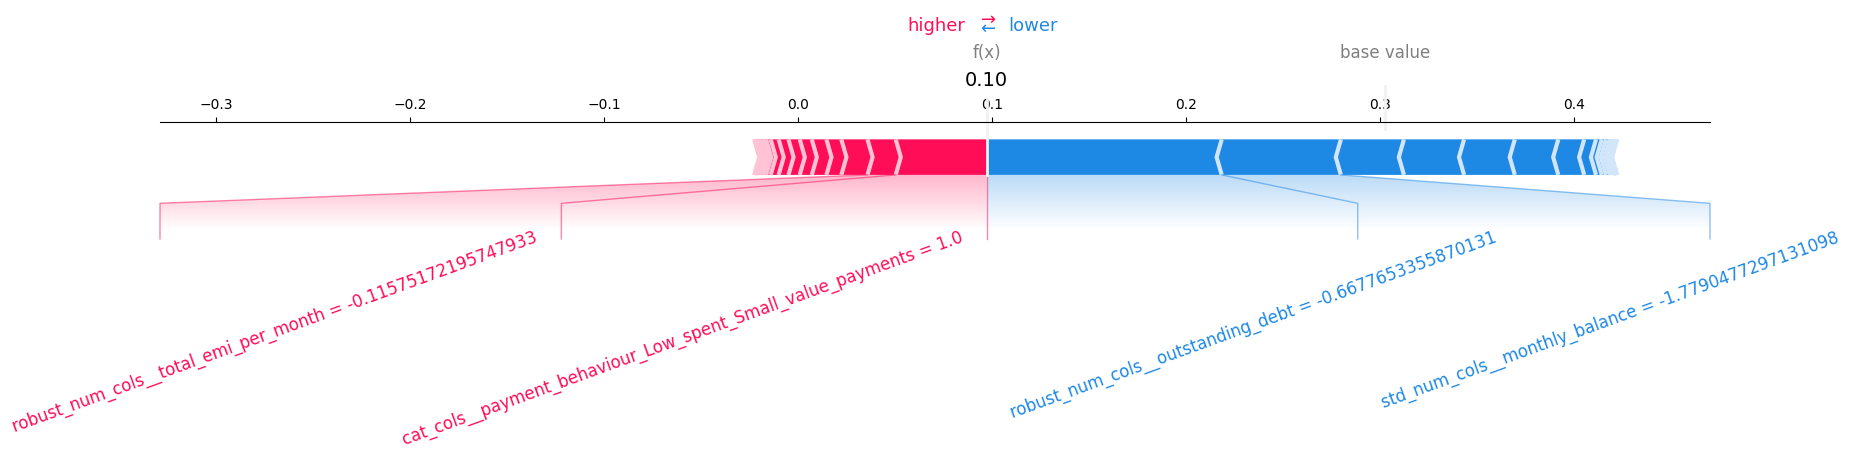

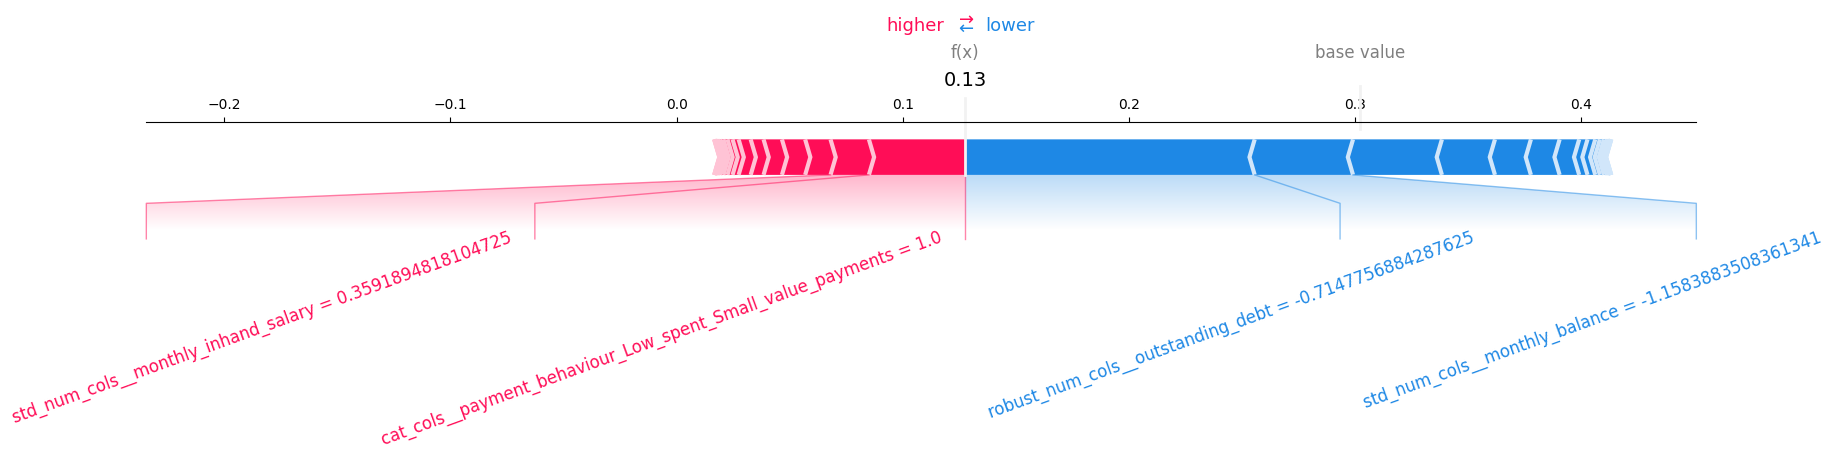

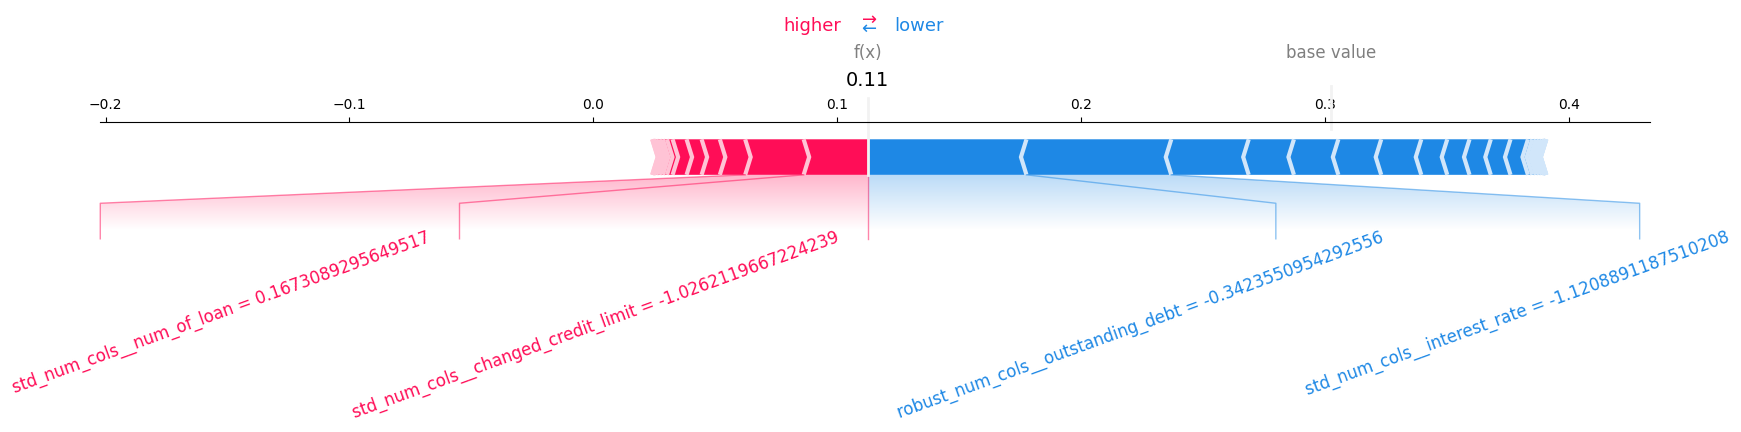

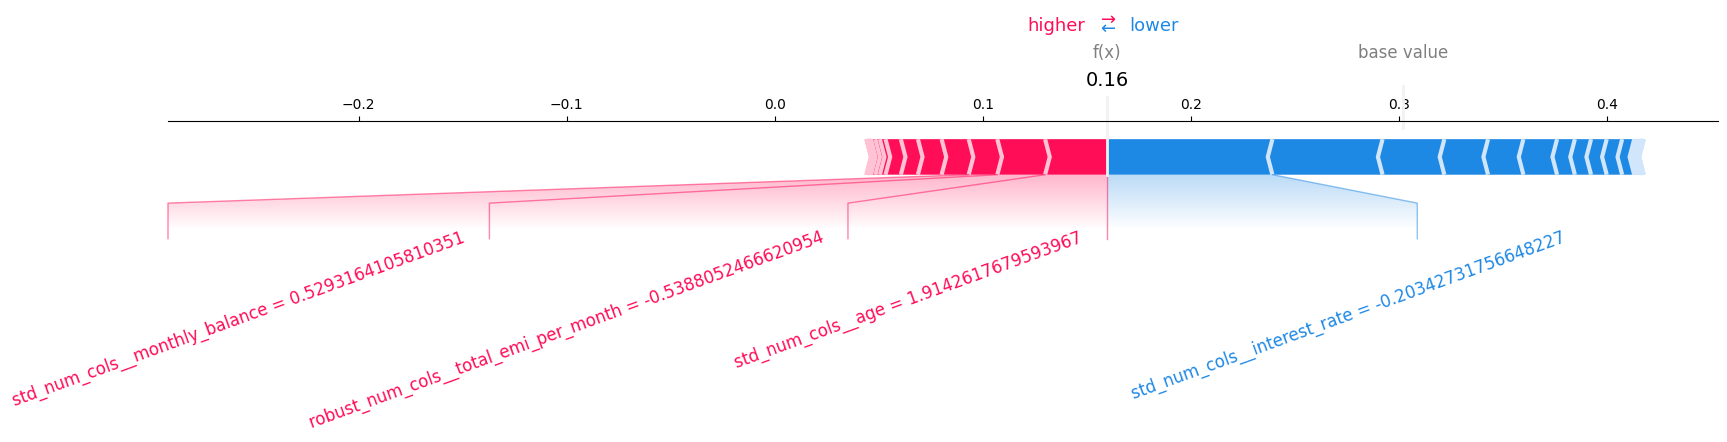

In [70]:
for idx in instancias:   
    shap.force_plot(
        explainer.expected_value[1],
        shap_values[1][idx],
        X_preprocessed.iloc[idx],
        text_rotation=20,
        matplotlib=True,
    )

En general podemos ver que las variables cuya presencia impactan de manera positiva a la clasificación son las esperables como interest_rate, outstanding_date, monthly_balance, delay_from_due_date, num_credit_card, así que por ese lado no parece que el modelo presente algún sesgo, sin embargo, dentro de las variables cuya presencia impactan de manera negativa a la clasificación se pueden encontrar descripciones de los clientes y edad, que si bien pueden ser factores relevantes al momento de entregar un crédito no tienen relación con el historial crediticio del cliente por lo que es posible que estos casos particulares deban ser revisados manualmente.

## 7. Conclusión

El problema de clasificación se resolvió de manera exitosa alcanzando un F1-score de 0.72 en el conjunto de prueba con el mejor modelo. Estos resultados son más que aceptables teniendo en cuenta que el DummyClassifier partía con un 0.49 de F1-score, además de que se obtuvo un modelo altamente interpretable que en general no pareciera presentar sesgos.

El análisis exploratorio ayudó en la comprensión de los datos al conocer la distribución de estos, y estudiar los valores atípicos, pues haciendo una eliminación conservadora de estos registros se mantenía una alta cantidad de datos (10688 registros de 12500), y disminuíamos el ruido que estos valores podrían provocar en los modelos.

El baseline tuvo un rendimiento aceptable en la mayoría de modelos, pero dentro de los mejores modelos la optimización no resultó en un mejora notable para la métrica objetivo. Si bien hubo mejoras, cabe la posibilidad de que aumentar el tiempo de ejecución permita mejorar los resultados, sobre todo para LightGBM que pareciera aumentar la métrica pero de manera muy lenta, mientras que XGBoost aumentaba rápido pero parecía llegar a un tope.

Me quedo conforme con los resultados obtenidos en este proyecto, sin embargo, como se mencionó antes, se podría aumentar el límite de tiempo en la optimización de hiperparámetros y también se podrían ampliar los intervalos de búsqueda. Una forma alternativa de modelar el problema podría ser mediante Deep Learning, específicamente mediante el uso de redes neuronales, debido a que estos modelos logran capturar de mejor manera las relaciones entre las variables, pero el problema de estos modelos es la nula interpretabilidad debido a que funcionan como cajas negras. 

Por último, lo más interesante que se aprendió en este proyecto no fue el análisis de los datos, procesamiento de datos e implementación de los modelos, sino la interpretabilidad de estos. Realmente el mayor aprendizaje fue conocer el área del análisis del riesgo crediticio, y precisamente obtener modelos interpretables permite obtener un mayor conocimiento en esta área. En última instancia, lo más entretenido de la ciencia de datos es tener que estar en constante aprendizaje e investigación, debido a la gran variedad de áreas en la cual puede aplicarse, lo que abre una ventana para conocer diversas áreas del conocimiento.